In [1]:
import sys
sys.path.append("../src/")
import utilities as utl
import os
import numpy as np
import pandas as pd
import time
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
tqdm().pandas(desc="Progress:")

In [2]:
data = utl.load_table()

In [3]:
data.head()

,id,timestamp,tweet,source,no_stop_words
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised,bbchealth,breast cancer risk test devised
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care BMA poll,bbchealth,gp workload harming care bma poll
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people s heart risk greater,bbchealth,short people heart risk greater
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV promising,bbchealth,new approach hiv promising
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition undermined NHS doctors,bbchealth,coalition undermined nhs doctors


In [4]:
data[data.no_stop_words.isna()]

,id,timestamp,tweet,source,no_stop_words


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer = TfidfVectorizer()
response = vectorizer.fit_transform(data.no_stop_words)

In [7]:
# vectors = np.array(response.toarray())

In [8]:
from sklearn.cluster import KMeans

In [9]:
inertias = dict()
all_kmeans = dict()

In [54]:
for k in tqdm(range(400, 430, 25)):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(response)
    inertias[k] = kmeans.inertia_
    all_kmeans[k] = kmeans
    print(k, inertias[k])

KeyboardInterrupt: 

In [28]:
inertias

{2: 62889.10256800957,
 3: 62761.5957865204,
 4: 62558.52472082953,
 5: 62442.8384096632,
 6: 62338.709597195215,
 7: 62321.3783390282,
 8: 62161.966539674184,
 9: 62086.610258919056,
 10: 61979.90225446474,
 11: 61864.32120736938,
 12: 61824.700815706776,
 13: 61805.35629855643,
 14: 61665.60523085047,
 15: 61659.52450043906,
 16: 61552.072551517595,
 17: 61486.29968504213,
 18: 61393.195522530346,
 19: 61437.70133425132,
 20: 61364.1152914869,
 21: 61284.07717772629,
 22: 61229.58602769753,
 23: 61181.31393580625,
 24: 61183.92550898059,
 25: 61053.32243654231,
 26: 61011.12573878794,
 27: 60956.22082453682,
 28: 60917.90560232131,
 30: 60814.25744383612,
 40: 60371.068644973304,
 50: 60012.875672412345,
 75: 59180.47259353198,
 100: 58545.92817566387,
 125: 58025.41433225534,
 150: 57550.24354507282}

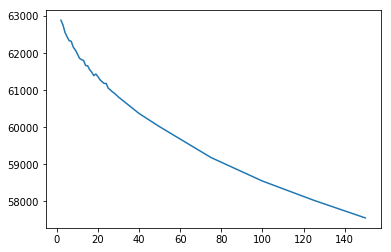

In [29]:
# labels
plt.plot(inertias.keys(), inertias.values())

In [47]:
kmeans = all_kmeans[150]

In [48]:
kmeans.labels_
labels = [(kmeans.labels_[i], data.tweet[i]) for i in range(0, len(kmeans.labels_))]

In [58]:
[s for l, s in labels if l == 60]

['Children   s hospital builds sleep app ',
 'Lack of sleep  link to diabetes  ',
 'Screen time  harms teenagers  sleep  ',
 'Poor sleep  link to teen drink risk  ',
 'E readers  damage sleep and health  ',
 'Brain  still active during sleep  ',
 'Sleep s memory role discovered ',
 ' Arrogance  over need for sleep ',
 'VIDEO  Can smartphones ruin your sleep  ',
 'Gadget light causing sleep problems ',
 'Lost sleep may mean lost brain cells ',
 'Social media  cuts teenagers  sleep  ',
 'More healing sleep for newborns ',
 'Sleep  cleans  the brain of toxins ',
 'How much can an extra hour s sleep change you  ',
 'VIDEO  Can an extra hour of sleep help  ',
 'Alberta Health Services dietician says sleep and hydration crucial for shift workers ',
 'Spring forward sleep woes  Coping with the snooze you lose in daylight saving time ',
 ' sleep tips for parents as the clock springs forward ',
 'Want to sleep easy  Don t use an iPad or tablet at bedtime  ',
 'Want to sleep easy  Don t use an i